In [10]:
import sys
import pandas as pd
import numpy as np
import sqlite3 as sql
import sklearn
import graphviz
from graphviz import Digraph
import seaborn as sns

In [11]:
# Create database connection
db = 'C:/CL-Project/Database/titanic.db'
conn = sql.connect(db)

In [12]:
titanic = pd.read_sql("SELECT * FROM passenger_list ", conn)

In [13]:
titanic

,Id,Name,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class,Survived,Gender
0,1,"Abbing, Mr. Anthony",40,"Cincinnati, Ohio",Southampton,"Cincinnati, Ohio, US",N/A,Unknown,3,0,M
1,2,"Abbott, Mr. Eugene Joseph",14,"East Providence, Rhode Island",Southampton,"East Providence, Rhode Island, US",N/A,Unknown,3,0,M
2,3,"Abbott, Mr. Rossmore Edward",16,"East Providence, Rhode Island",Southampton,"East Providence, Rhode Island, US",N/A,Unknown,3,0,M
3,4,"Abbott, Mrs. Rhoda Mary (nИe Hunt)",39,"East Providence, Rhode Island",Southampton,"East Providence, Rhode Island, US",A,N/A,3,1,F
4,5,"Abd al-Khaliq, Mr. Farid Qasim Husayn",18,Shana,Cherbourg,New York City,N/A,Unknown,3,0,M
5,6,"Abelseth, Miss Karen Marie",16,Sondmore,Southampton,"Los Angeles, California, US",16,N/A,3,1,F
6,7,"Abelseth, Mr. Olaus JЬrgensen",25,"Perkins County, South Dakota",Southampton,"Perkins County, South Dakota, US",A,N/A,3,1,M
7,8,"Abelson, Mr. Samuel",30,Russia,Cherbourg,"New York, New York, US",N/A,Unknown,2,0,M
8,9,"Abelson, Mrs. Anna (nИe Wizosky?)",28,Russia,Cherbourg,"New York, New York, US",10,N/A,2,1,F
9,10,"Abrahamsson, Mr. Abraham August Johannes",20,Dalsbruk,Southampton,"Hoboken, New Jersey, US",15,N/A,3,1,M


titanic.loc[titanic["Age"].str.contains("\smo.$", na=False), ["Age"] = pd.to_numeric(titanic.loc[titanic["Age"].str.contains("\smo.$", na=False), "Age"].str.replace("\smo.$", "")) / 12

titanic = pd.read_sql("commit", conn)
titanic

ValueError: could not convert string to float: '--'

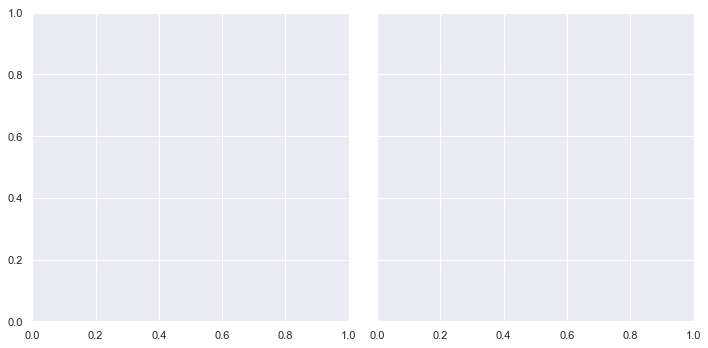

In [17]:
sns.set(style="darkgrid")
pal = dict(M="#6495ED", F="#F08080")
g = sns.lmplot(x="Age", y="Survived", col="Gender", hue="Gender", data=titanic,
               palette=pal, y_jitter=.02, logistic=True)

valid_class = {1,2,3}
valid_gender = list("M","F")
valid_age = list(range(0, 100))
valid_survived = list(0,1)